<a href="https://colab.research.google.com/github/Enilsonn/my_own/blob/main/gera%C3%A7%C3%A3o_automatica_de_numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms

In [3]:
transform = transforms.ToTensor()
train = datasets.MNIST(root = '.', train = True, download = True, transform = transform)
train_loader = torch.utils.data.DataLoader(train, batch_size = 256)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 39375152.12it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1166291.44it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8272884.34it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 13039376.30it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
class Gerador(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(100, 32)
    self.dense1 = nn.Linear(32, 64)
    self.dense2 = nn.Linear(64, 128)
    self.dense3 = nn.Linear(128, 784)

    self.dropout = nn.Dropout(0.3)

  def forward(self,X):
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = torch.tanh(self.dense3(X))
    X = X.view(X.shape[0], 28, 28)
    return X

class Discriminador(nn.Module):
  def __init__(self):
    super().__init__()

    self.dense0 = nn.Linear(784, 128)
    self.dense1 = nn.Linear(128, 64)
    self.dense2 = nn.Linear(64,32)
    self.dense3 = nn.Linear(32, 1)

    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = X.view(X.shape[0], 28*28)

    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = self.dense3(X) # a funcao de ativacao eh feita for da classe pelum criterion especifico
    return X

In [5]:
G = Gerador()
D = Discriminador()

In [6]:
G_optimizer = optim.Adam(G.parameters(), lr = 0.002)
D_optimizer = optim.Adam(D.parameters(), lr = 0.002)

In [7]:
criterion = nn.BCEWithLogitsLoss()
# combina uma camada de sigmiod com uma cama de binarycross entropy loss, ou seja: ja aplica uma funcao de ativacao
# logits = o perceptron n aplicou uma funcao de ativacao

In [8]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [9]:
G.to(device)

Gerador(
  (dense0): Linear(in_features=100, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=128, bias=True)
  (dense3): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [10]:
D.to(device)

Discriminador(
  (dense0): Linear(in_features=784, out_features=128, bias=True)
  (dense1): Linear(in_features=128, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=32, bias=True)
  (dense3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Epoca 001 finalizada: custo discriminador 1.23596 - custo gerador 1.27127        


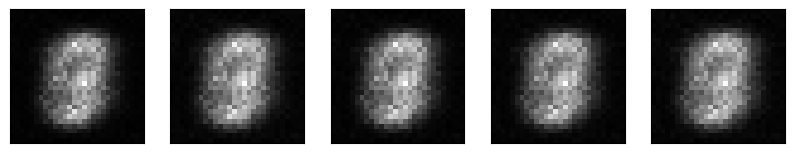

Epoca 002 finalizada: custo discriminador 1.22908 - custo gerador 1.37341        


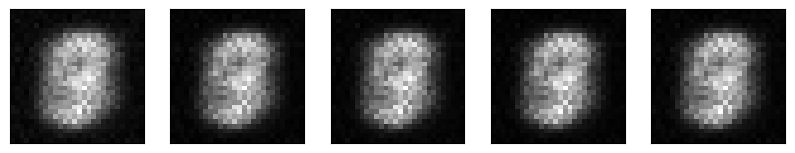

Epoca 003 finalizada: custo discriminador 1.26677 - custo gerador 1.21129        


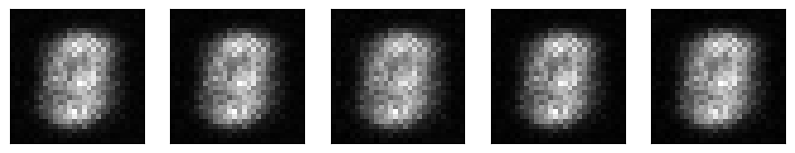

Epoca 004 finalizada: custo discriminador 1.25348 - custo gerador 1.40302        


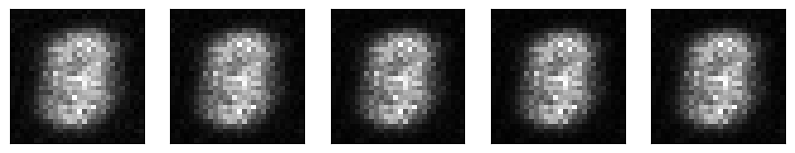

Epoca 005 finalizada: custo discriminador 1.24279 - custo gerador 1.50716        


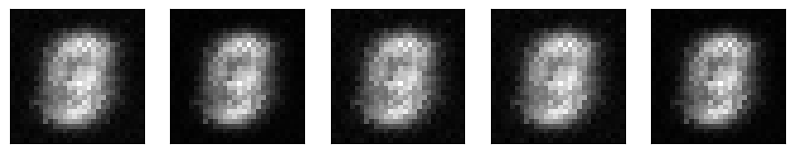

Epoca 006 finalizada: custo discriminador 1.32007 - custo gerador 0.90009        


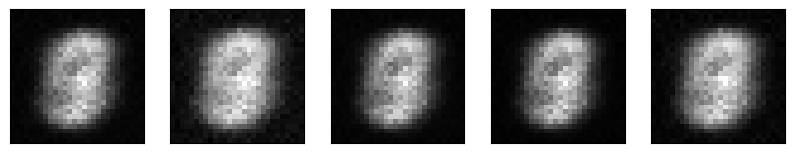

Epoca 007 finalizada: custo discriminador 1.28062 - custo gerador 1.20940        


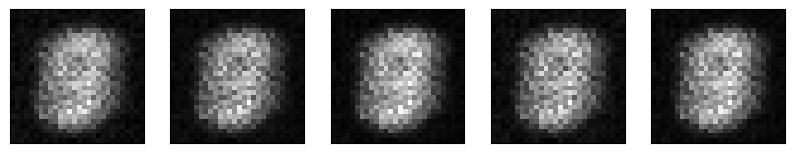

Epoca 008 finalizada: custo discriminador 1.32747 - custo gerador 1.18011        


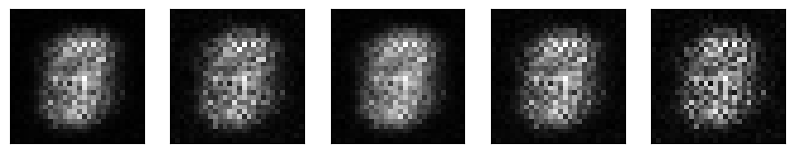

Epoca 009 finalizada: custo discriminador 1.29717 - custo gerador 1.08894        


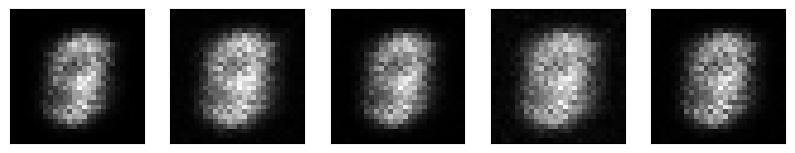

Epoca 010 finalizada: custo discriminador 1.26917 - custo gerador 1.01102        


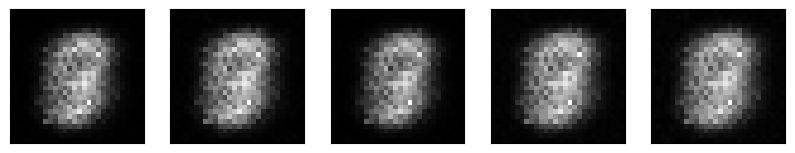

Epoca 011 finalizada: custo discriminador 1.30759 - custo gerador 1.54144        


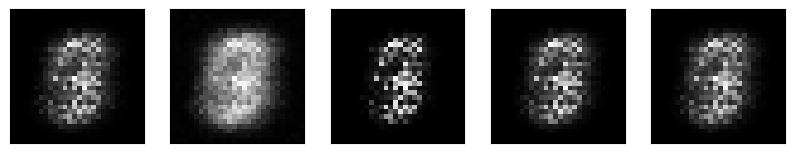

Epoca 012 finalizada: custo discriminador 1.28293 - custo gerador 1.02936        


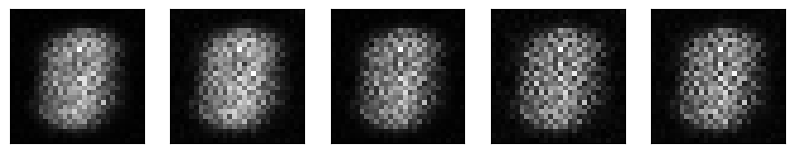

Epoca 013 finalizada: custo discriminador 1.27150 - custo gerador 1.34253        


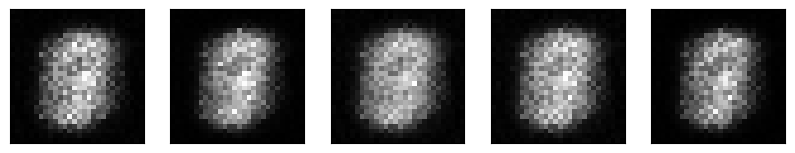

Epoca 014 finalizada: custo discriminador 1.32196 - custo gerador 1.06510        


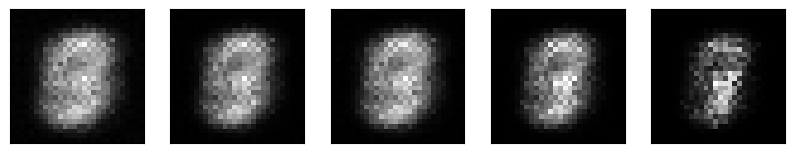

Epoca 015 finalizada: custo discriminador 1.27641 - custo gerador 1.10868        


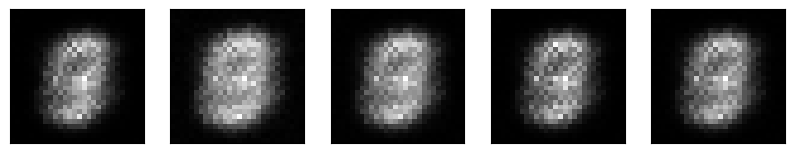

Epoca 016 finalizada: custo discriminador 1.29154 - custo gerador 0.98577        


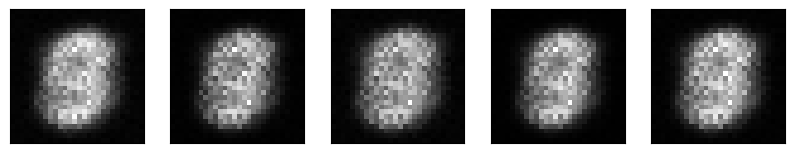

Epoca 017 finalizada: custo discriminador 1.26582 - custo gerador 1.14513        


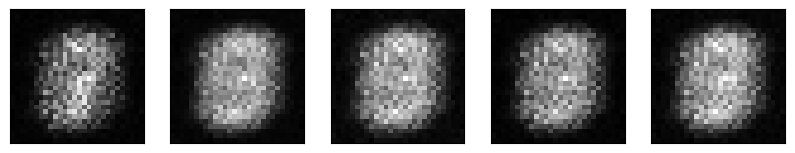

Epoca 018 finalizada: custo discriminador 1.35086 - custo gerador 1.06406        


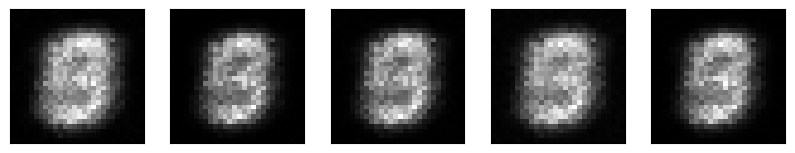

Epoca 019 finalizada: custo discriminador 1.33763 - custo gerador 0.88735        


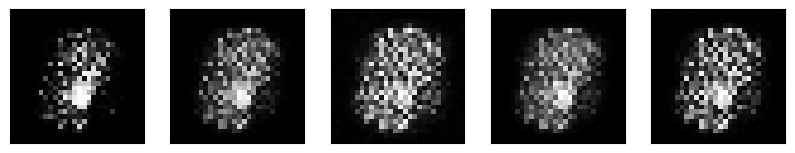

Epoca 020 finalizada: custo discriminador 1.29796 - custo gerador 1.08288        


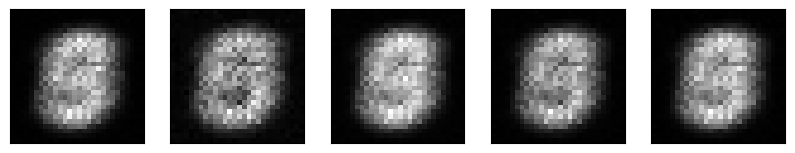

Epoca 021 finalizada: custo discriminador 1.30002 - custo gerador 1.05033        


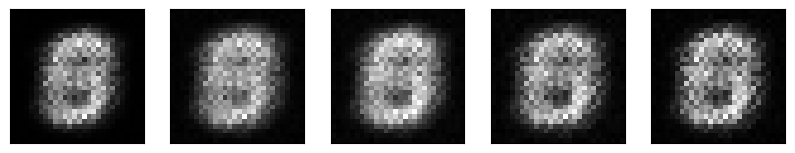

Epoca 022 finalizada: custo discriminador 1.31369 - custo gerador 1.09131        


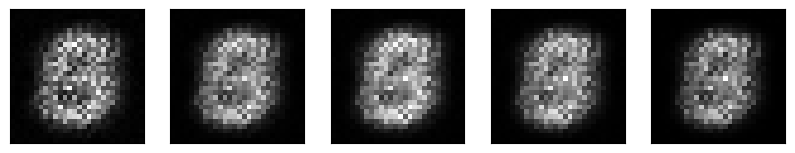

Epoca 023 finalizada: custo discriminador 1.33436 - custo gerador 1.21823        


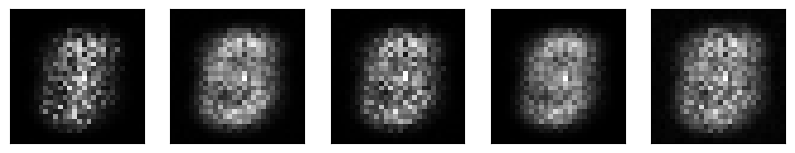

Epoca 024 finalizada: custo discriminador 1.31956 - custo gerador 1.35288        


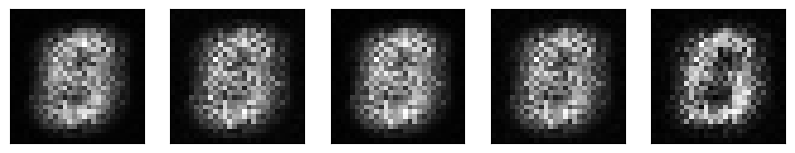

Epoca 025 finalizada: custo discriminador 1.34330 - custo gerador 1.47612        


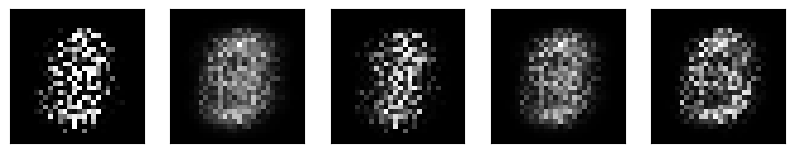

Epoca 026 finalizada: custo discriminador 1.29931 - custo gerador 1.92798        


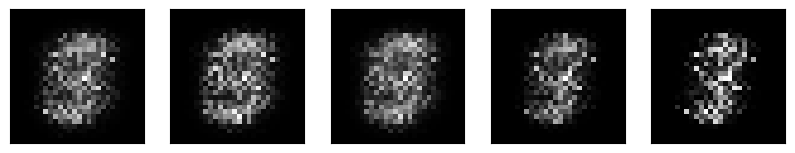

Epoca 027 finalizada: custo discriminador 1.24624 - custo gerador 2.77334        


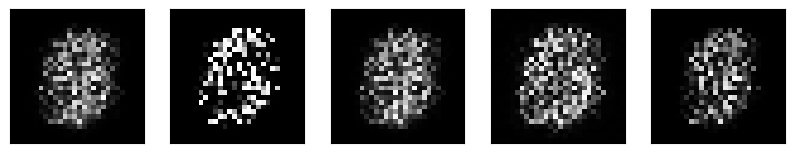

Epoca 028 finalizada: custo discriminador 1.00254 - custo gerador 7.37666        


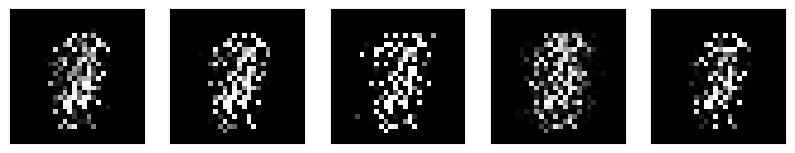

Epoca 029 finalizada: custo discriminador 0.70202 - custo gerador 11.94107        


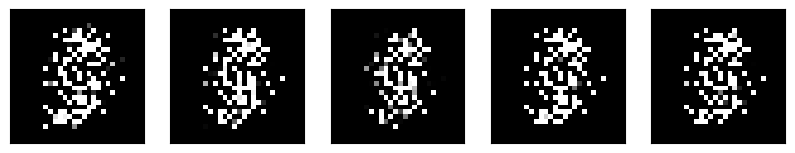

Epoca 030 finalizada: custo discriminador 0.47519 - custo gerador 18.64127        


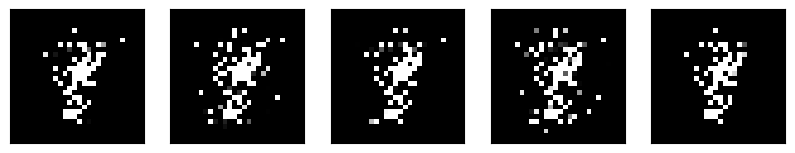

Epoca 031 finalizada: custo discriminador 0.38828 - custo gerador 24.46695        


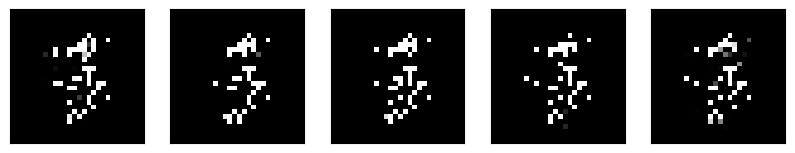

Epoca 032 finalizada: custo discriminador 0.36715 - custo gerador 26.32190        


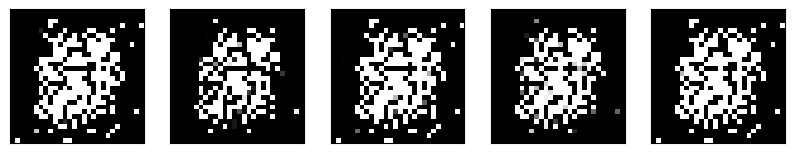

Epoca 033 finalizada: custo discriminador 0.50098 - custo gerador 19.19908        


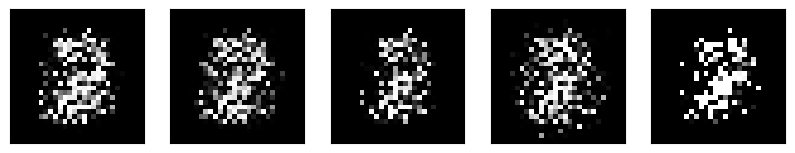

Epoca 034 finalizada: custo discriminador 0.53827 - custo gerador 12.48624        


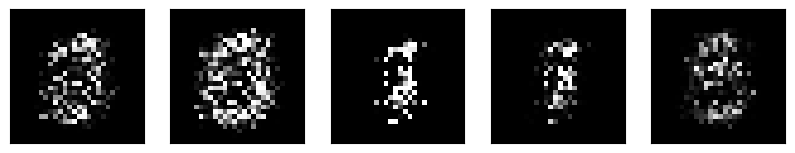

Epoca 035 finalizada: custo discriminador 0.59356 - custo gerador 10.43990        


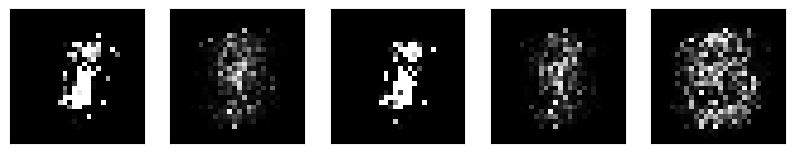

Epoca 036 finalizada: custo discriminador 0.62090 - custo gerador 8.58250        


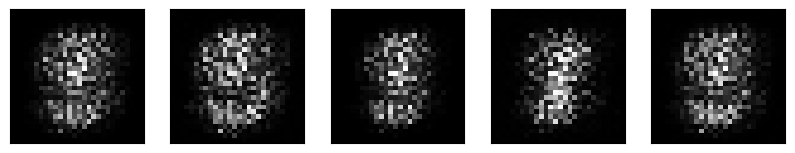

Epoca 037 finalizada: custo discriminador 0.76625 - custo gerador 6.32962        


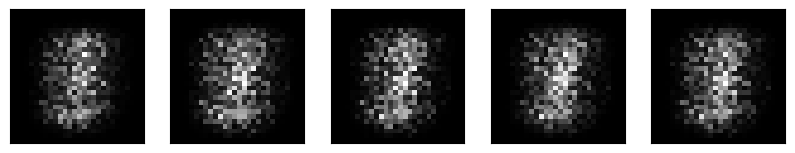

Epoca 038 finalizada: custo discriminador 0.97337 - custo gerador 3.23039        


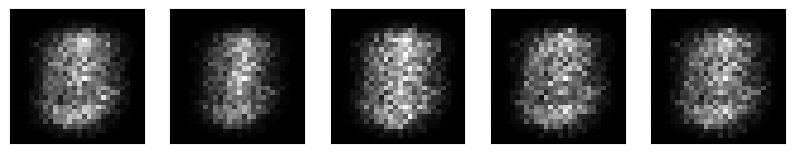

Epoca 039 finalizada: custo discriminador 1.07824 - custo gerador 2.03308        


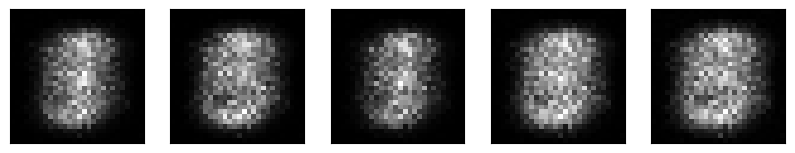

Epoca 040 finalizada: custo discriminador 0.90373 - custo gerador 2.03056        


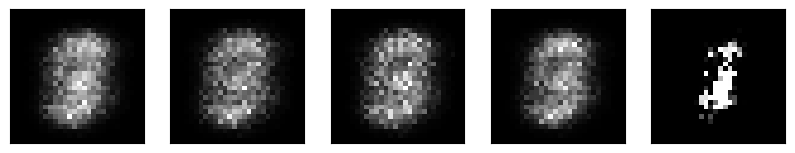

Epoca 041 finalizada: custo discriminador 0.82890 - custo gerador 2.56294        


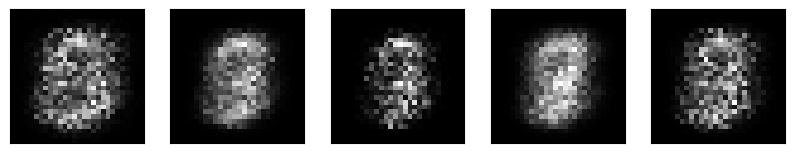

Epoca 042 finalizada: custo discriminador 0.70938 - custo gerador 3.33323        


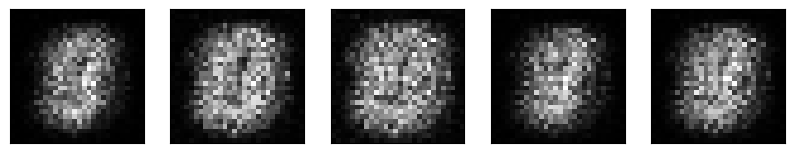

Epoca 043 finalizada: custo discriminador 0.65496 - custo gerador 3.78335        


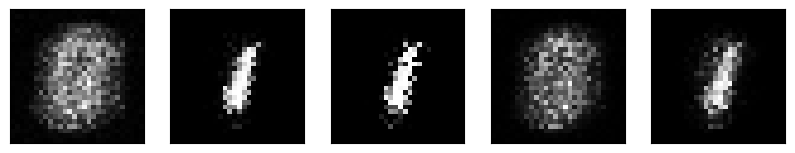

Epoca 044 finalizada: custo discriminador 0.64974 - custo gerador 3.87039        


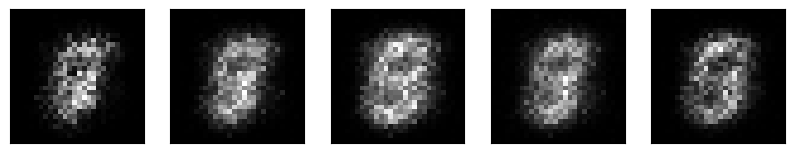

Epoca 045 finalizada: custo discriminador 0.71273 - custo gerador 3.63295        


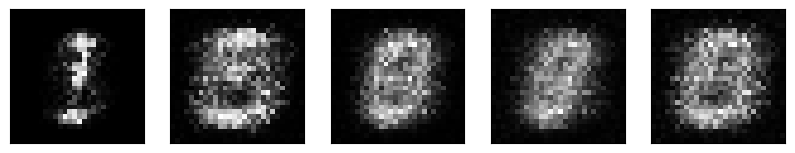

Epoca 046 finalizada: custo discriminador 0.68357 - custo gerador 3.32749        


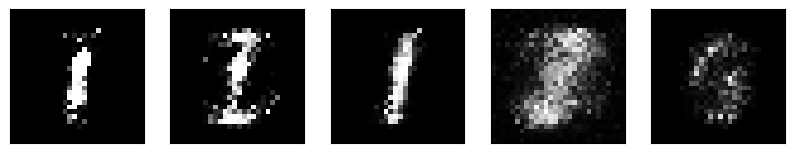

Epoca 047 finalizada: custo discriminador 0.65889 - custo gerador 3.52399        


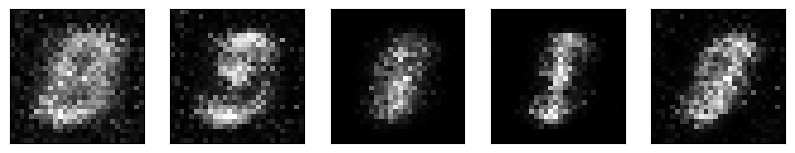

Epoca 048 finalizada: custo discriminador 0.72418 - custo gerador 3.43451        


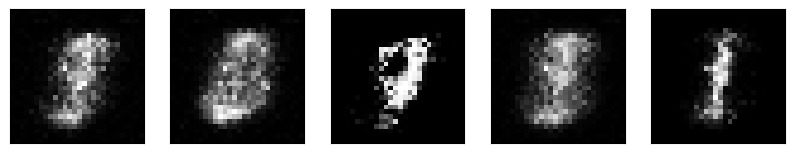

Epoca 049 finalizada: custo discriminador 0.74258 - custo gerador 3.04639        


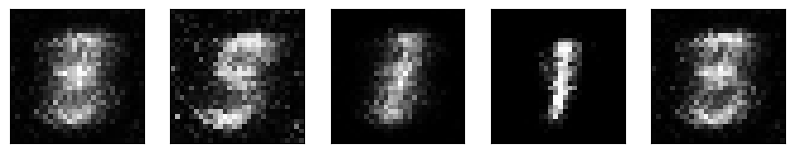

Epoca 050 finalizada: custo discriminador 0.83522 - custo gerador 2.62536        


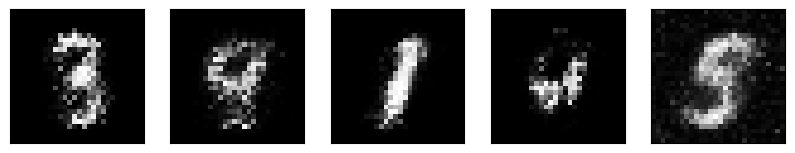

Epoca 051 finalizada: custo discriminador 0.78078 - custo gerador 2.76845        


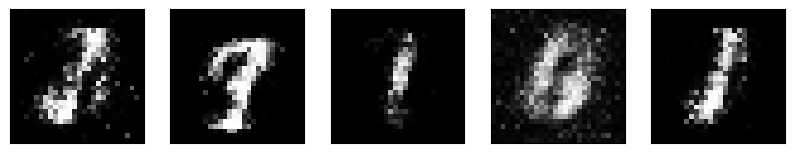

Epoca 052 finalizada: custo discriminador 0.84581 - custo gerador 2.48006        


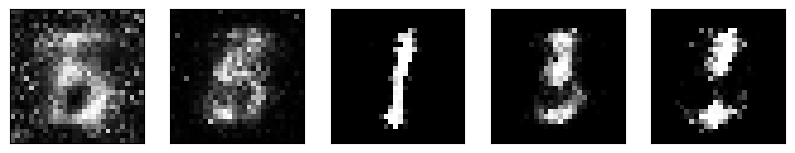

Epoca 053 finalizada: custo discriminador 0.88161 - custo gerador 2.34077        


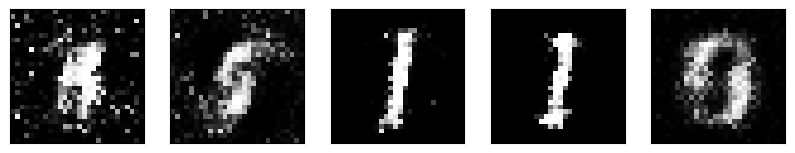

Epoca 054 finalizada: custo discriminador 0.89025 - custo gerador 2.18628        


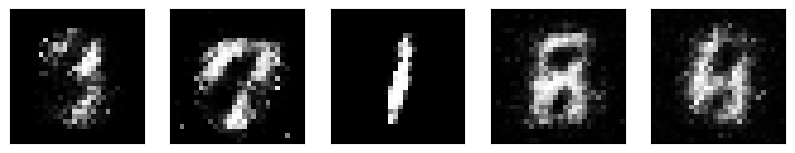

Epoca 055 finalizada: custo discriminador 0.92077 - custo gerador 2.03999        


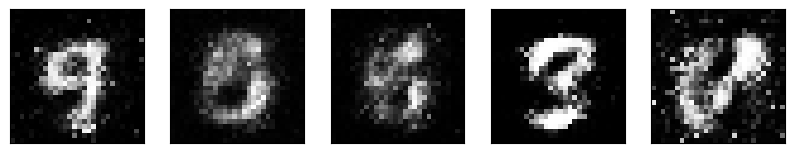

Epoca 056 finalizada: custo discriminador 0.98330 - custo gerador 1.83011        


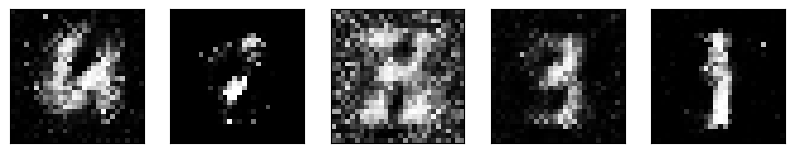

Epoca 057 finalizada: custo discriminador 1.02851 - custo gerador 1.67903        


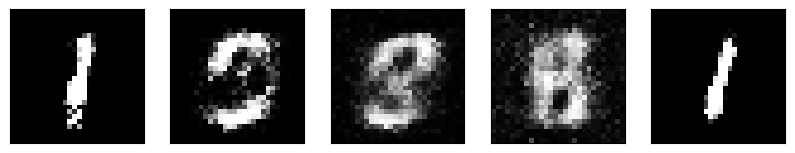

Epoca 058 finalizada: custo discriminador 1.01434 - custo gerador 1.71372        


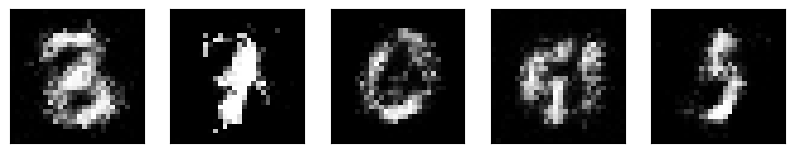

Epoca 059 finalizada: custo discriminador 1.02356 - custo gerador 1.72610        


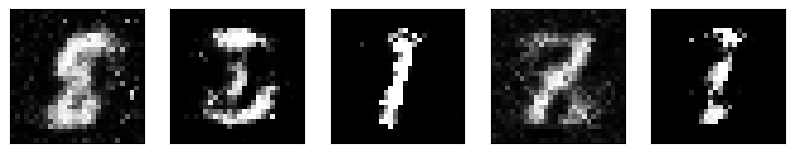

Epoca 060 finalizada: custo discriminador 1.06708 - custo gerador 1.56281        


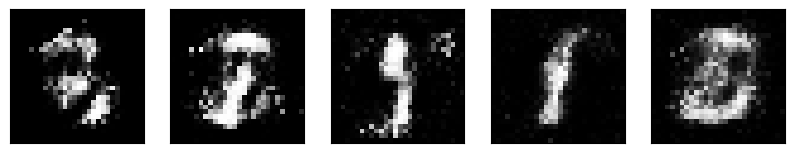

Epoca 061 finalizada: custo discriminador 1.06527 - custo gerador 1.54672        


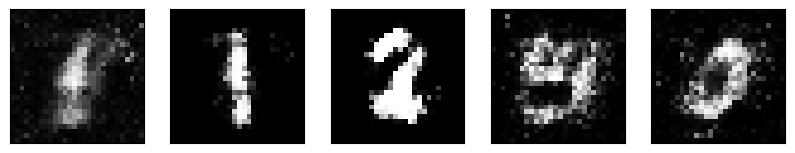

Epoca 062 finalizada: custo discriminador 1.09568 - custo gerador 1.48316        


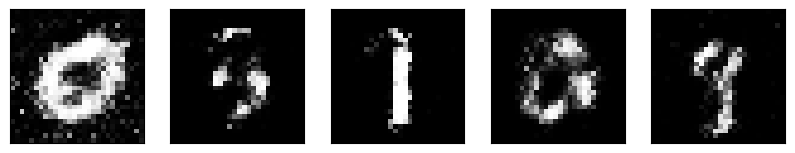

Epoca 063 finalizada: custo discriminador 1.10068 - custo gerador 1.45399        


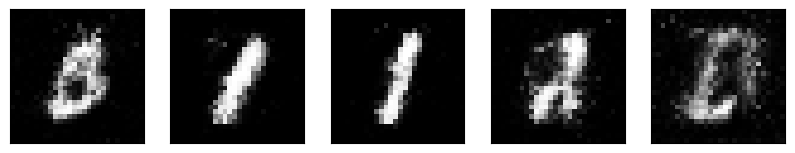

Epoca 064 finalizada: custo discriminador 1.14284 - custo gerador 1.36263        


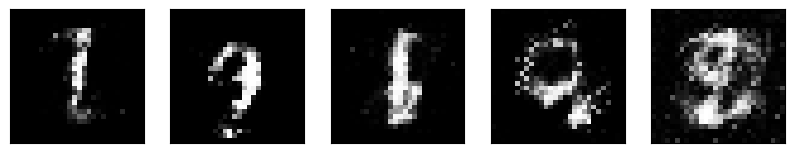

Epoca 065 finalizada: custo discriminador 1.18412 - custo gerador 1.24128        


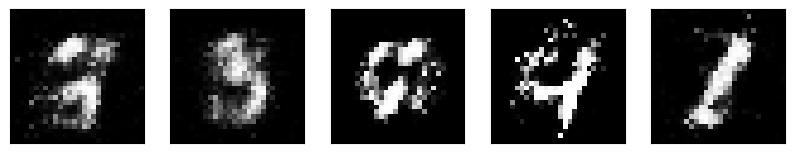

Epoca 066 finalizada: custo discriminador 1.17910 - custo gerador 1.25729        


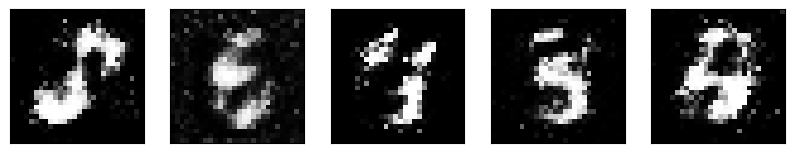

Epoca 067 finalizada: custo discriminador 1.18617 - custo gerador 1.22776        


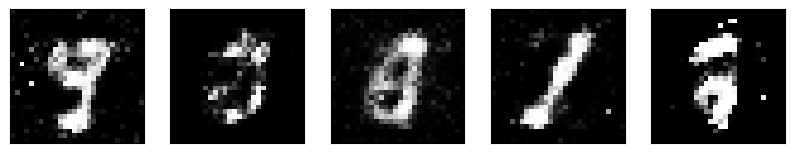

Epoca 068 finalizada: custo discriminador 1.19710 - custo gerador 1.20583        


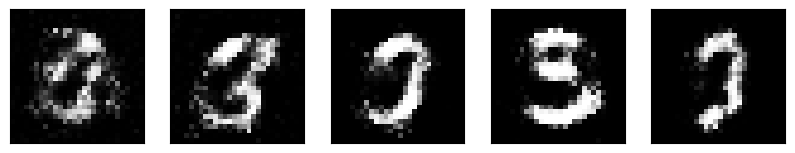

Epoca 069 finalizada: custo discriminador 1.19720 - custo gerador 1.19931        


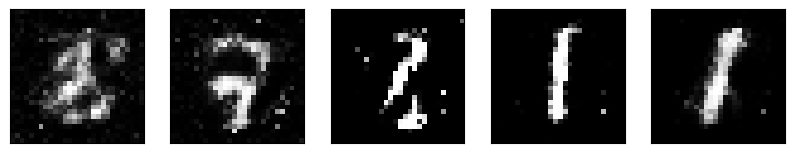

Epoca 070 finalizada: custo discriminador 1.22849 - custo gerador 1.14678        


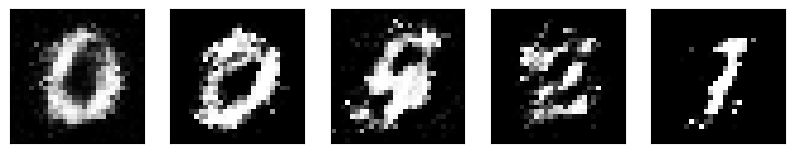

Epoca 071 finalizada: custo discriminador 1.22483 - custo gerador 1.15341        


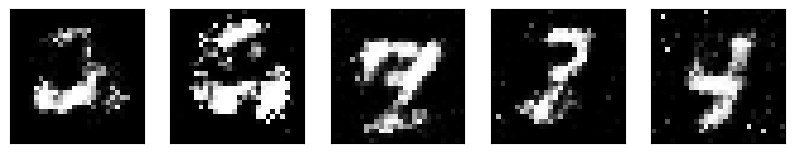

Epoca 072 finalizada: custo discriminador 1.23718 - custo gerador 1.11873        


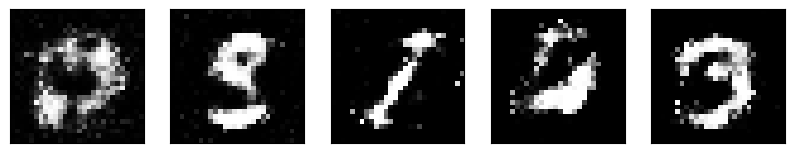

Epoca 073 finalizada: custo discriminador 1.25305 - custo gerador 1.09460        


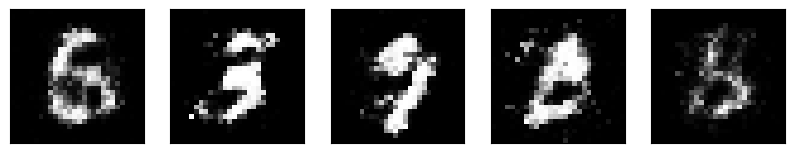

Epoca 074 finalizada: custo discriminador 1.25487 - custo gerador 1.09155        


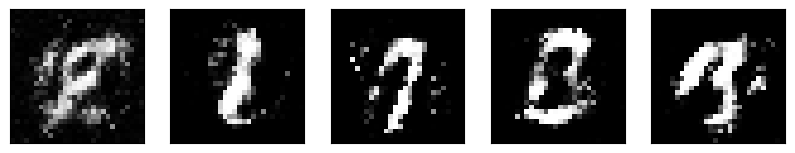

Epoca 075 finalizada: custo discriminador 1.24109 - custo gerador 1.12077        


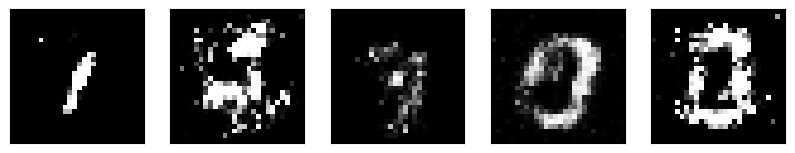

Epoca 076 finalizada: custo discriminador 1.26529 - custo gerador 1.07163        


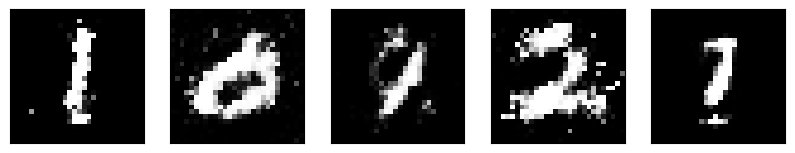

Epoca 077 finalizada: custo discriminador 1.26594 - custo gerador 1.06336        


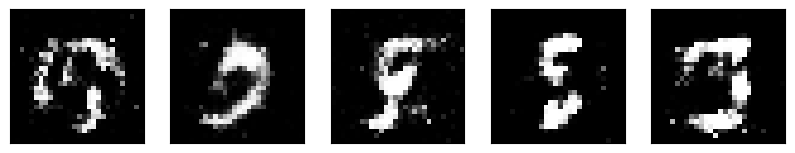

Epoca 078 finalizada: custo discriminador 1.26941 - custo gerador 1.04973        


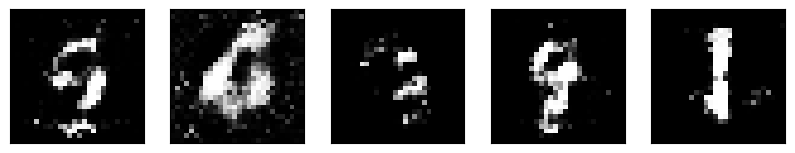

Epoca 079 finalizada: custo discriminador 1.25793 - custo gerador 1.08729        


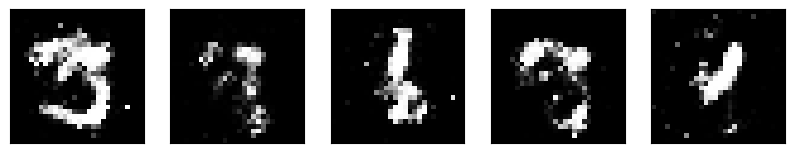

Epoca 080 finalizada: custo discriminador 1.25948 - custo gerador 1.10092        


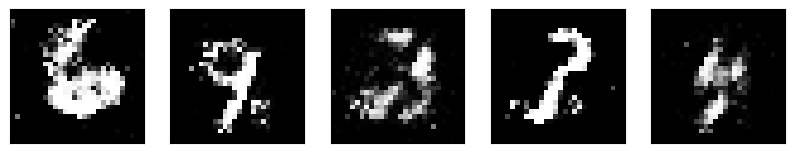

Epoca 081 finalizada: custo discriminador 1.27144 - custo gerador 1.05679        


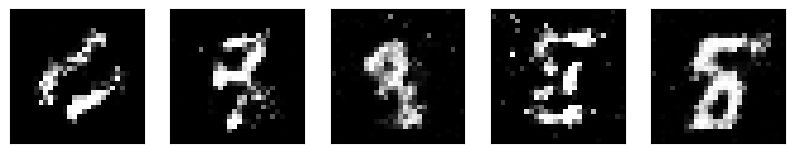

Epoca 082 finalizada: custo discriminador 1.26194 - custo gerador 1.09230        


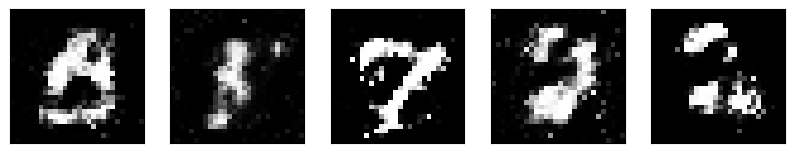

Epoca 083 finalizada: custo discriminador 1.25139 - custo gerador 1.11617        


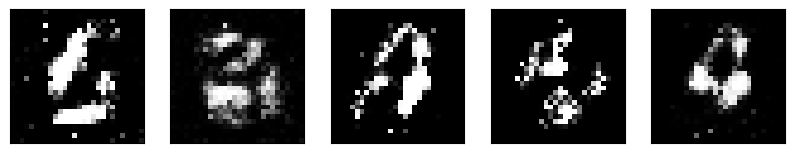

Epoca 084 finalizada: custo discriminador 1.24738 - custo gerador 1.13137        


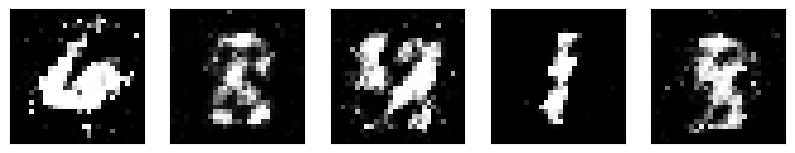

Epoca 085 finalizada: custo discriminador 1.26337 - custo gerador 1.10303        


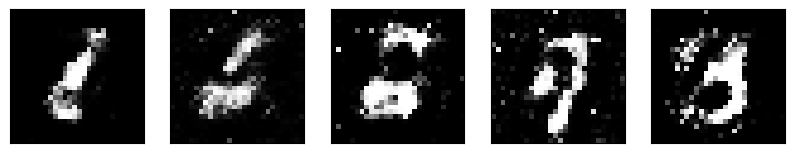

Epoca 086 finalizada: custo discriminador 1.24103 - custo gerador 1.12680        


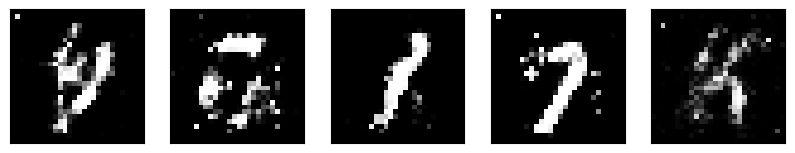

Epoca 087 finalizada: custo discriminador 1.25348 - custo gerador 1.11022        


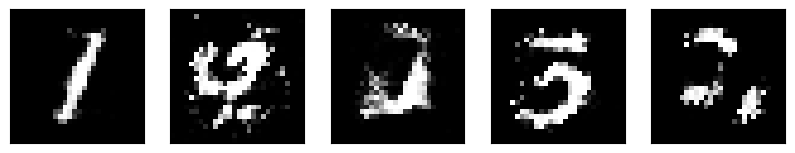

Epoca 088 finalizada: custo discriminador 1.26035 - custo gerador 1.09485        


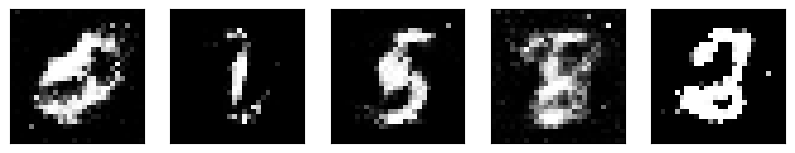

Epoca 089 finalizada: custo discriminador 1.25917 - custo gerador 1.08325        


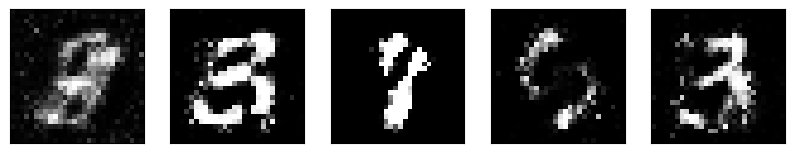

Epoca 090 finalizada: custo discriminador 1.27239 - custo gerador 1.07457        


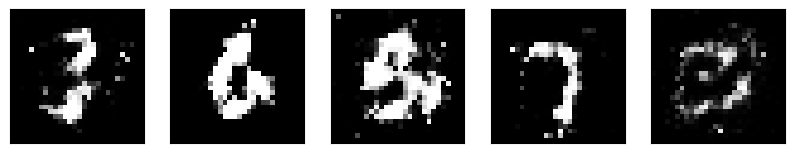

Epoca 091 finalizada: custo discriminador 1.26526 - custo gerador 1.06226        


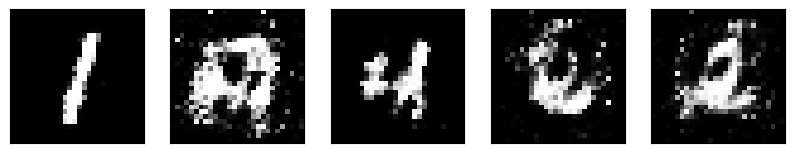

Epoca 092 finalizada: custo discriminador 1.27434 - custo gerador 1.07190        


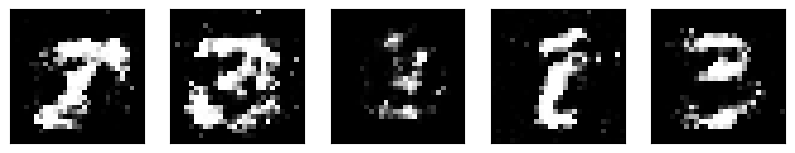

Epoca 093 finalizada: custo discriminador 1.25735 - custo gerador 1.10337        


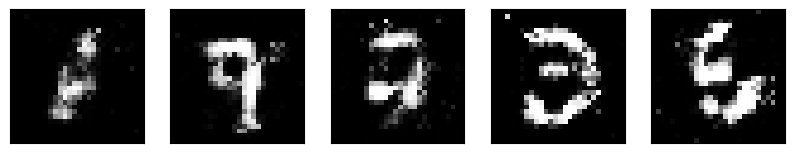

Epoca 094 finalizada: custo discriminador 1.26265 - custo gerador 1.08660        


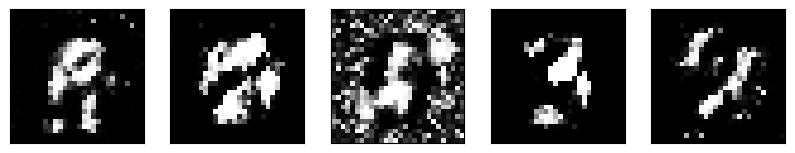

Epoca 095 finalizada: custo discriminador 1.27465 - custo gerador 1.07551        


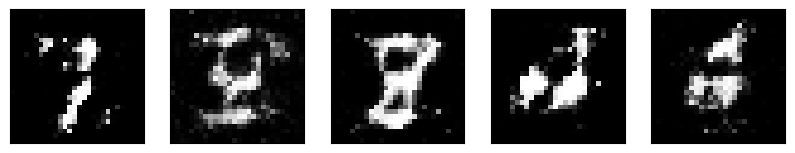

Epoca 096 finalizada: custo discriminador 1.27542 - custo gerador 1.06210        


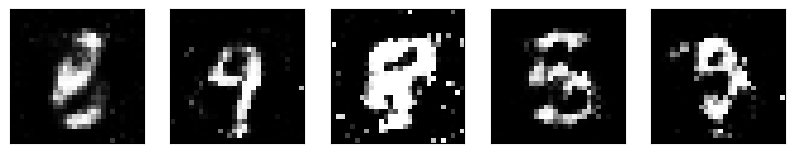

Epoca 097 finalizada: custo discriminador 1.25601 - custo gerador 1.09890        


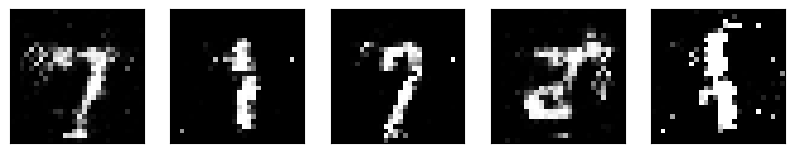

Epoca 098 finalizada: custo discriminador 1.26803 - custo gerador 1.06531        


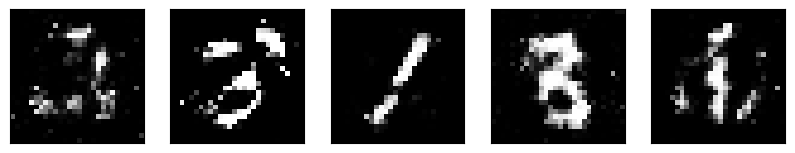

Epoca 099 finalizada: custo discriminador 1.26477 - custo gerador 1.08341        


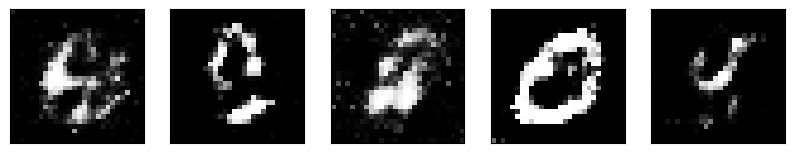

Epoca 100 finalizada: custo discriminador 1.26598 - custo gerador 1.06248        


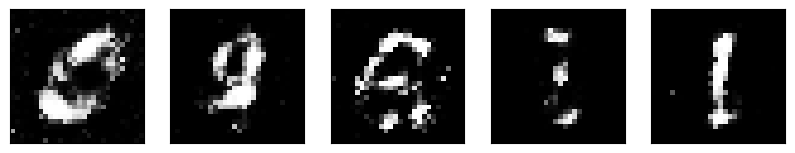

In [13]:
for epoch in range(100):
  D_running_loss = 0.
  G_running_loss = 0.

  for i, (imagens_reais, _) in enumerate(train_loader):
    batch_size = imagens_reais.size(0)
    imagens_reais = imagens_reais * 2 - 1 # imagens(0, 1) -> imagens(-1, 1)
    imagens_reais = imagens_reais.to(device)

    # treinamento do gerador
    G_optimizer.zero_grad()
    ruido = np.random.uniform(low = -1., high = 1., size = (batch_size, 100)) # size = (quantidade_de_vetores, tamanho_do_vetor)
    ruido = torch.from_numpy(ruido).float().to(device)

    imagens_falsas = G.forward(ruido)
    outputs_falsas = D.forward(imagens_falsas)

    labels_falsas = torch.ones(batch_size).to(device)

    G_loss = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)

    G_loss.backward()
    G_optimizer.step()

    G_running_loss += G_loss.item()

    # treinamento do discriminador
    D_optimizer.zero_grad()
    outputs_reais = D.forward(imagens_reais)

    labels_reais = (torch.ones(batch_size) * 0.9).to(device) # 0.9 eh um fator de suavisacao -- uma matriz cheia de 0.9

    D_loss_reais = criterion(outputs_reais.view(*labels_reais.shape), labels_reais)

    imagens_falsas = G.forward(ruido)
    outputs_falsas = D.forward(imagens_falsas)

    labels_falsas = torch.zeros(batch_size).to(device)

    D_loss_falsas = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)

    D_loss = D_loss_reais + D_loss_falsas

    D_loss.backward()
    D_optimizer.step()

    D_running_loss += D_loss.item()

    #print('\rEpoca: {:3d} - Loop {:3d} de {:3d}: custo discriminador {:03.5f} - custo gerador {:03.5f}'.format(epoch +1, i+1, len(train_loader), D_loss.item(), G_loss.item(), end = '\r'))

  D_running_loss /= len(train_loader)
  G_running_loss /= len(train_loader)
  print('Epoca {:03d} finalizada: custo discriminador {:03.5f} - custo gerador {:03.5f}        '.format(epoch + 1, D_running_loss, G_running_loss))

  fig, ax = plt.subplots(1, 5, figsize = (10,5))
  for i in range(5):
    ax[i].imshow(imagens_falsas.cpu().detach().numpy()[i].reshape(28,28), cmap = 'gray')
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)
  plt.show()